In [28]:
import numpy as np
import dill
import importlib
import sys
import os
import matplotlib.pyplot as plt
'''
v4 Uses the object imported from the py file class which is very similar to the Optimal_Stopping_Function_v3

As of 1/13/23, the only change is the addition of the decision to action delay
'''

'\nv4 Uses the object imported from the py file class which is very similar to the Optimal_Stopping_Function_v3\n\nAs of 1/13/23, the only change is the addition of the decision to action delay\n'

In [29]:
sys.path.insert(0, r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp1\Scripts\Modeling_Scripts\Optimal Stopping') 
sys.path.insert(0, r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp2\Scripts\Analysis_and_Statistics') 
sys.path.insert(0, r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement') 

import Optimal_Stopping_Object_v4
from Exp2_Subject_Object import *
from plot_functions import *
importlib.reload(Optimal_Stopping_Object_v4) # Reloads so I don't have to restart kernel if I change a function in the Object of another py file

<module 'Optimal_Stopping_Object_v4' from 'D:\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\Exp1\\Scripts\\Modeling_Scripts\\Optimal Stopping\\Optimal_Stopping_Object_v4.py'>

# Initial Thangs

In [30]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir('D:\OneDrive - University of Delaware - o365\Subject_Data\MatchPennies_Agent_Exp2')
PATH = os.getcwd()
SAVE_PATH = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Group_Figures\Exp2\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)

tp3_title = "Win = 1\nIncorrect = 0\nIndecision = 0"
tp4_title = "Win = 1\nIncorrect = -1\nIndecision = 0"
tp5_title = "Win = 1\nIncorrect = 0\nIndecision = -1"
tp6_title = "Win = 1\nIncorrect = -1\nIndecision = -1"
trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title]
num_blocks = len(trial_block_titles)

num_subjects

5

# Pickle Data

In [31]:
NUM_STDS = 2
append_dict = {0:'reaction_time_no_sd_off',1:'reaction_time_minus_sd',2:'reaction_time_minus_2sd'}
load_path = 'Subjects_Analyzed\\'
# subject = dill.load((open(load_path + f'subject_object_{append_dict[NUM_STDS]}_dict.pkl', 'rb')))
group = dill.load((open(load_path + f'group_object_{append_dict[NUM_STDS]}.pkl', 'rb')))
group.analyze_data()

D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp2\Scripts\Analysis_and_Statistics\Exp2_Subject_Object.py:386: RuntimeWarning: Mean of empty slice
  self.binned_player_task_leave_times_mean            = np.nanmean(self.binned_player_task_leave_times,axis=2) # Mean for each bin, each condition
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp2\Scripts\Analysis_and_Statistics\Exp2_Subject_Object.py:387: RuntimeWarning: Mean of empty slice
  self.binned_player_minus_agent_task_leave_time_mean = np.nanmean(self.binned_player_minus_agent_task_leave_time,axis=2)


# Create Model

In [32]:
group.coincidence_reach_time.shape

(5, 50)

In [33]:
np.nanstd(group.react_reaction_time_only_react)

37.07704633059587

In [34]:

group_model = Optimal_Stopping_Object_v4.Optimal_Decision_Time_Model(
    experiment='exp2', num_blocks =4, BETA_ON = False,
    agent_means = np.array([1100]*4),agent_sds = np.array([150]*4), 
    reaction_time = np.nanmean(group.react_reaction_time_only_react)-40 , movement_time = np.nanmean(group.react_movement_time_only_react)-100,
    reaction_uncertainty = np.nanstd(group.react_reaction_time_only_react), movement_uncertainty = np.nanstd(group.react_movement_time_only_react),
    timing_uncertainty = np.array([np.nanstd(group.coincidence_reach_time)]*4),
    perc_wins_when_both_reach = np.nanmean(group.perc_gamble_wins_when_both_decide,axis=0),
    decision_action_delay_uncertainty = 10, decision_action_delay_mean = 50,
    unknown_gamble_uncertainty_on = False, unknown_gamble_uncertainty = 100,
    unknown_gamble_delay_on = False, unknown_gamble_delay = 200,
    known_gamble_uncertainty_on = False, known_gamble_uncertainty = 150,
    known_gamble_delay_on = False, known_gamble_delay = 150
    )
group_model.run_model()
group_model_tuned = group_model

In [35]:
# group_model = Optimal_leave_time_Model(reaction_time = 300, movement_time = 100, incorrect_cost = 0,
#                                           reaction_uncertainty = 0.00001, movement_uncertainty = 0.00001,
#                                           timing_uncertainty = 0.00001,
#                                           decision_action_delay_uncertainty = 0.00001, decision_action_delay_mean = 50,
#                                          )

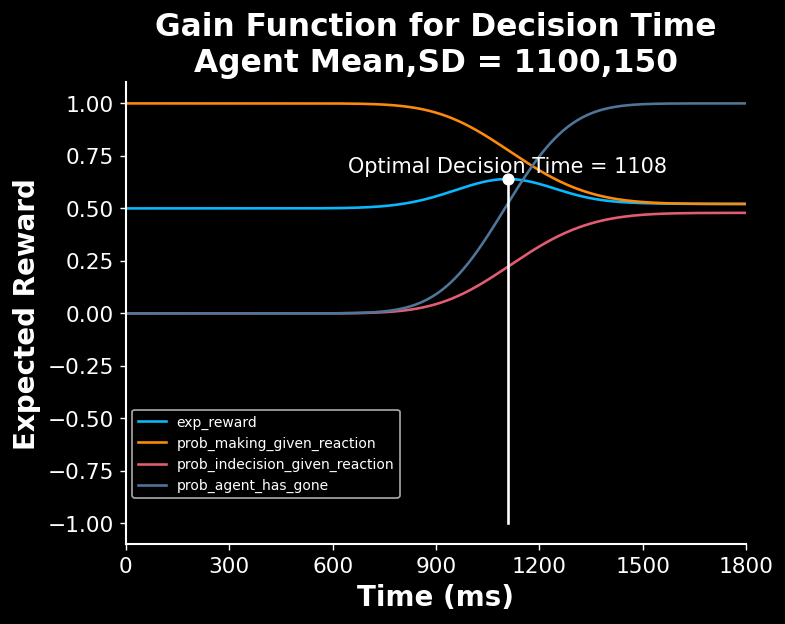

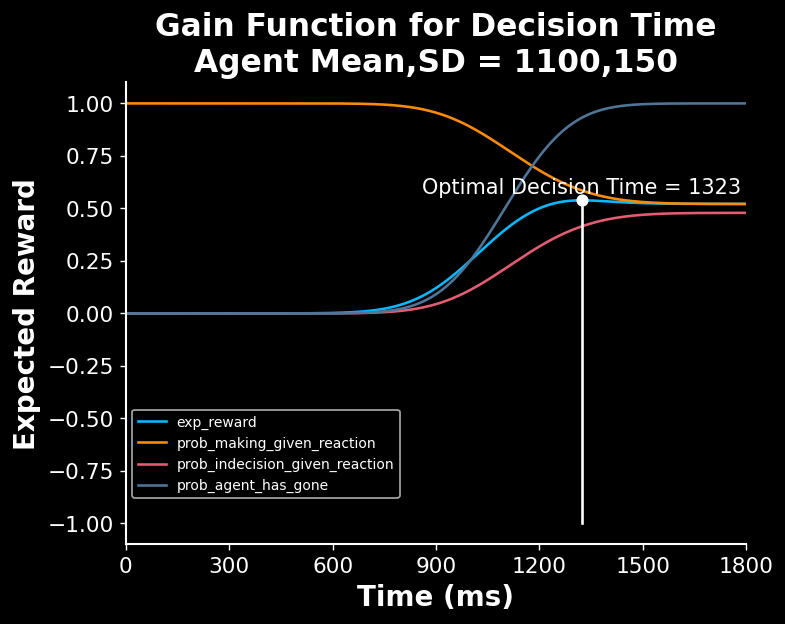

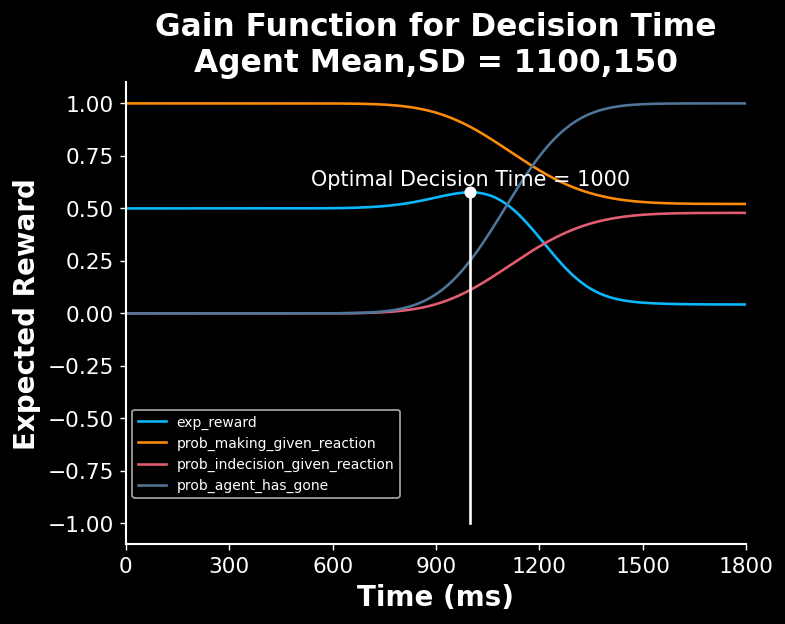

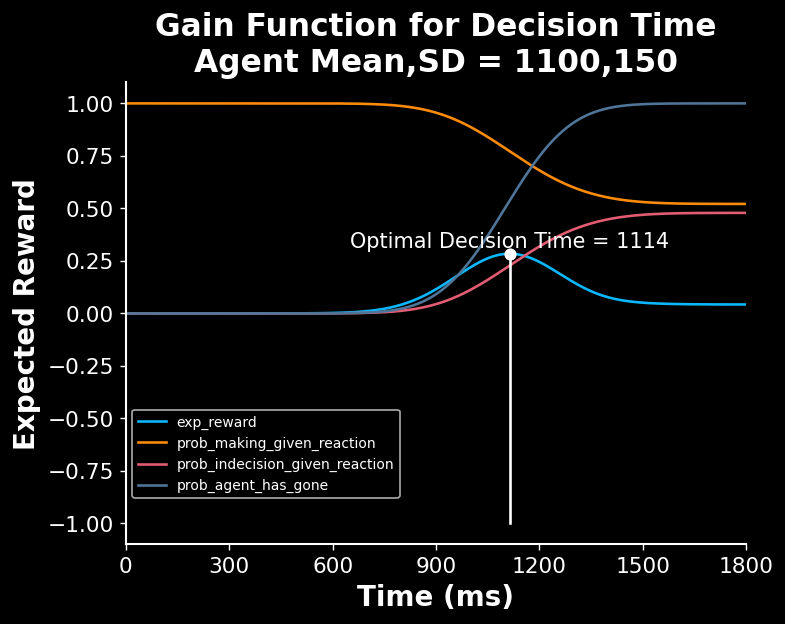

In [36]:
group_model.plot_optimals(metrics = ['exp_reward','prob_making_given_reaction','prob_indecision_given_reaction','prob_agent_has_gone'])#,'exp_reward_reaction','exp_reward_gamble','prob_selecting_reaction'])

# Plots

In [37]:
save = False

In [38]:
group.player_task_leave_time.shape

(5, 4, 80)

Player Median Leave Time

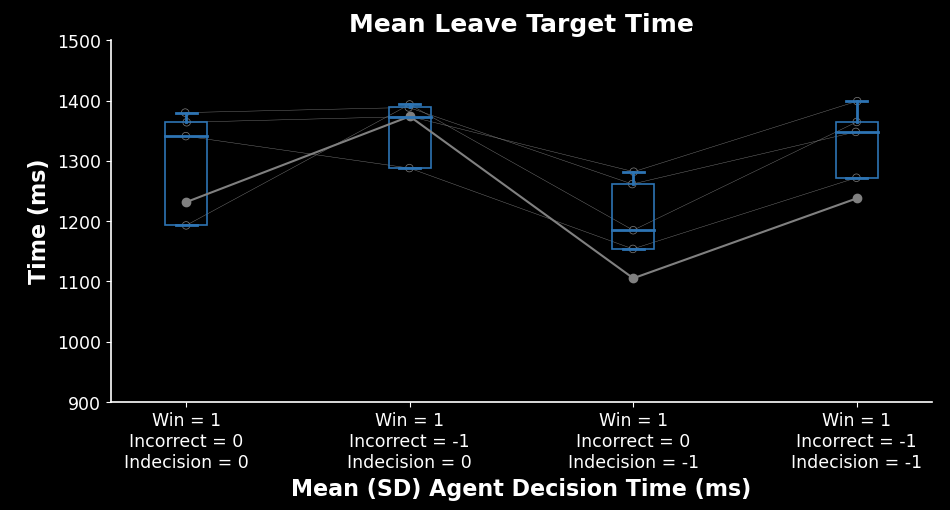

In [39]:
metric = np.nanmedian(group.player_task_leave_time,axis=2) 
optimal_metric = group_model.wtd_optimal_leave_target_time
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(900,1600,100)
bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='grey',marker='o')


ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Leave Target Time')
if save:
    plt.savefig(SAVE_PATH+'mean_leave_target_time_with_optimal_simulation', dpi = 400, transparent = True)
axmain.set_axis_off()


plt.show()

Player Minus Agent Mean Leave Target Time

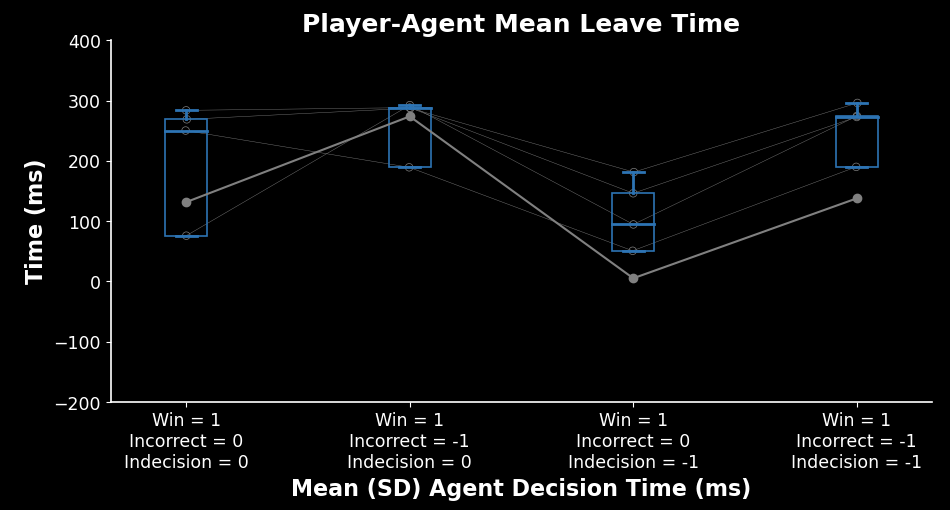

In [40]:
metric = np.nanmedian(group.player_minus_agent_task_leave_time,axis=2) 
optimal_metric = group_model.player_minus_agent_leave_time
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(-200,500,100)
bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='grey',marker='o')


ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Player-Agent Mean Leave Time')
if save:
    axmain.set_axis_off()
    # plt.savefig(SAVE_PATH+'mean_leave_target_time_with_optimal_simulation', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

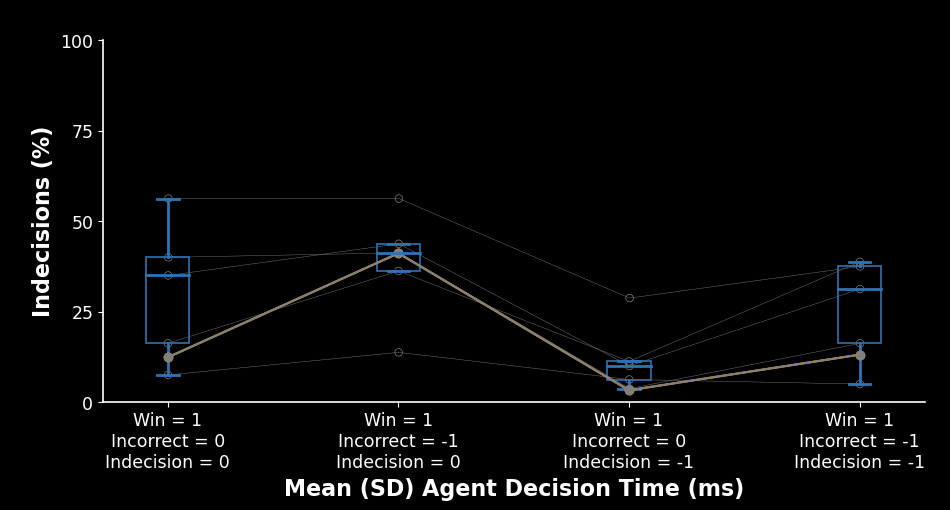

In [41]:
metric = group.player_perc_indecisions 
optimal_metric = group_model.prob_indecision_optimal_ER*100
optimal_metric_calc = group_model.perc_indecision_optimal_calc

# optimal_metric = group_model.prob_indecision_based_on_reach_time
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='orange',marker='o')
ax.plot(xlocs,optimal_metric_calc,c='grey',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Indecisions (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'indecisions_with_optimal_model', dpi = 400, transparent = True)
    
axmain.set_axis_off()

plt.show()

In [52]:
group.player_perc_wins

array([[60.  , 57.5 , 62.5 , 75.  ],
       [26.25, 23.75, 38.75, 30.  ],
       [37.5 , 51.25, 46.25, 42.5 ],
       [48.75, 53.75, 52.5 , 67.5 ],
       [52.5 , 56.25, 55.  , 48.75]])

In [49]:
group.find_subject('player_perc_wins',70,'greater than')

Sub0


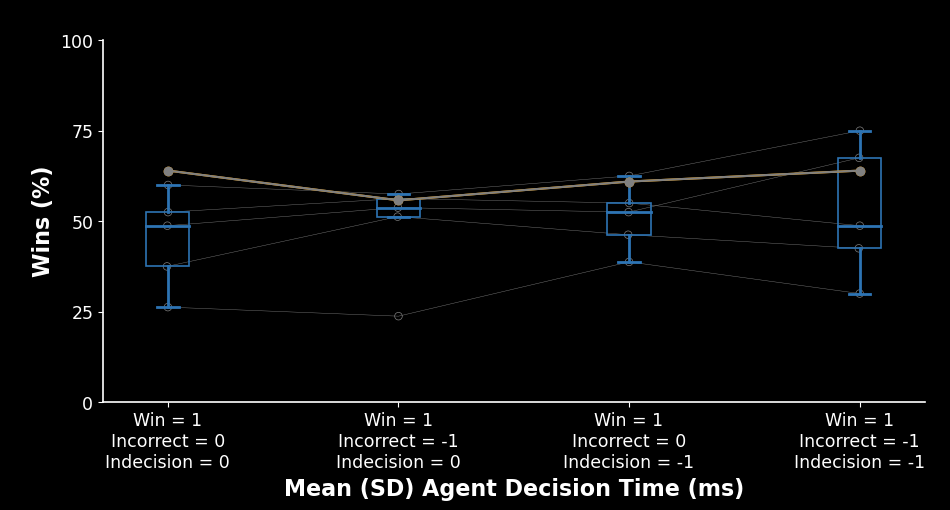

In [44]:
metric = group.player_perc_wins 
optimal_metric = group_model.prob_win_optimal_ER*100
optimal_metric_calc = group_model.perc_win_optimal_calc

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='orange',marker='o')
ax.plot(xlocs,optimal_metric_calc,c='grey',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Wins (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'wins_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

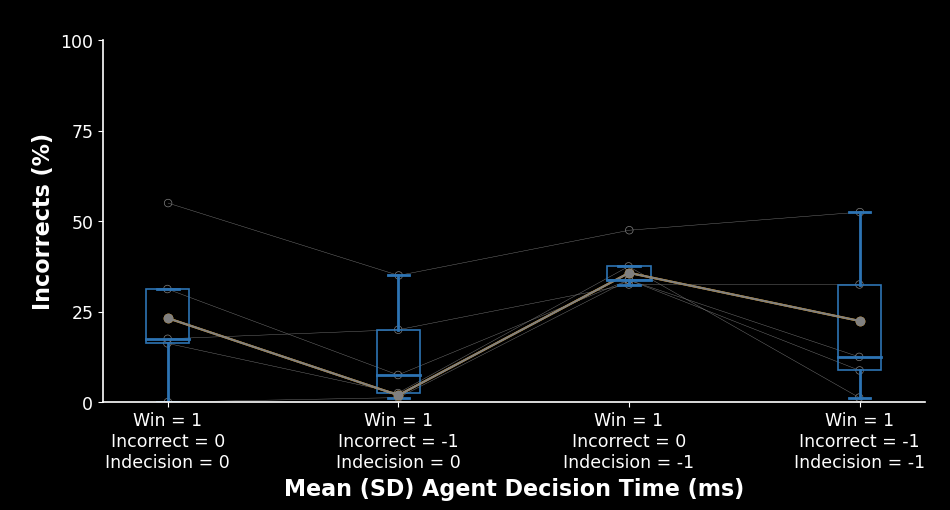

In [45]:
metric = group.combine_all_subjects('player_perc_incorrects') 
optimal_metric = group_model.prob_incorrect_optimal_ER*100
optimal_metric_calc = group_model.perc_incorrect_optimal_calc

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='orange',marker='o')
ax.plot(xlocs,optimal_metric_calc,c='grey',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Incorrects (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'incorrects_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Reaction and Gamble Decisions

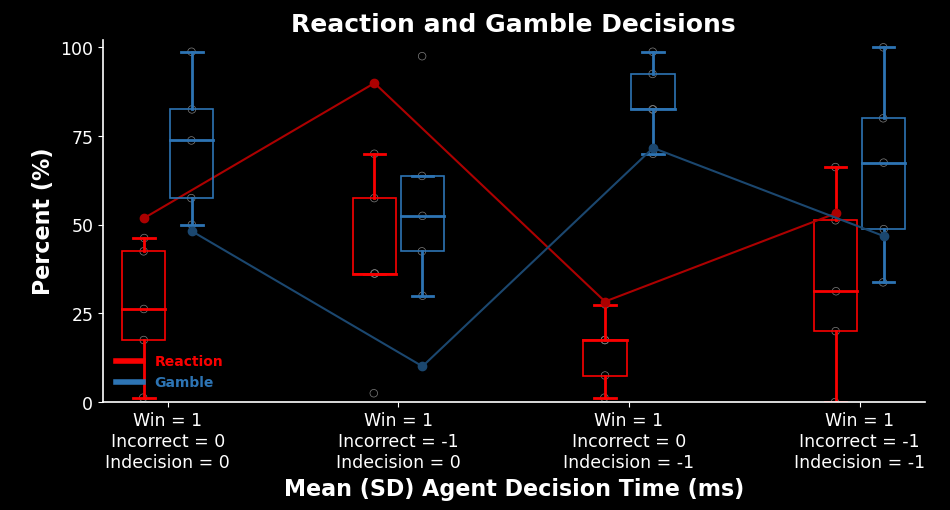

In [53]:
optimal_metric1 = group_model.prob_selecting_reaction_optimal_ER*100
optimal_metric2 = group_model.prob_selecting_gamble_optimal_ER*100
data_metric1 = group.combine_all_subjects('perc_reaction_decisions')
data_metric2 = group.combine_all_subjects('perc_gamble_decisions')

# Out of x number of reaction and gamble decisions, how many of them were indecisions
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,data_metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=data_metric1.T,lw = 0, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,data_metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=data_metric2.T, lw=0,noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Reaction and Gamble Decisions')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decisions_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Reaction and Gamble Leave Times

In [54]:
optimal_metric1 = group_model.optimal_reaction_leave_target_time
optimal_metric2 = group_model.optimal_gamble_leave_target_time
data_metric1 = group.combine_all_subjects('player_reaction_leave_time_mean')
data_metric2 = group.combine_all_subjects('player_gamble_leave_time_mean')

# Out of x number of reaction and gamble decisions, how many of them were indecisions
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(800,1700,100)


bw = 0.75
multi_boxplot(ax,data_metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=data_metric1.T,lw = 0, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,data_metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=data_metric2.T, lw=0,noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Reaction and Gamble Decision Times')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_leave_times_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

AttributeError: 'Optimal_Decision_Time_Model' object has no attribute 'optimal_reaction_leave_target_time'

Agent Reaction and Gamble Decision Times

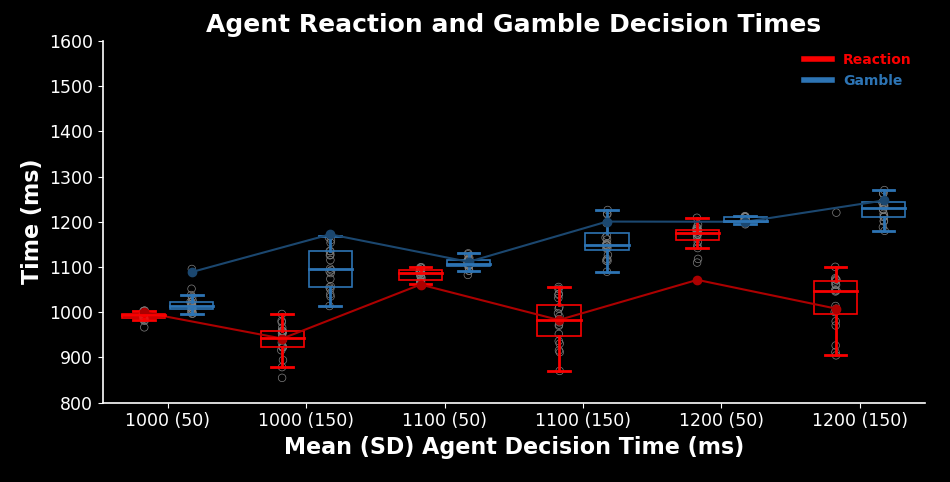

In [ ]:
optimal_metric1 = group_model.cutoff_agent_reaction_mean_optimal
optimal_metric2 = group_model.cutoff_agent_gamble_mean_optimal
data_metric1 = group.combine_all_subjects('agent_reaction_leave_time_mean')
data_metric2 = group.combine_all_subjects('agent_gamble_leave_time_mean')

# Out of x number of reaction and gamble decisions, how many of them were indecisions
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(800,1700,100)


bw = 0.75
multi_boxplot(ax,data_metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=data_metric1.T,lw = 0, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,data_metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=data_metric2.T, lw=0,noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Agent Reaction and Gamble Decision Times')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_leave_times_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Percent Indecisions That Were Gambles

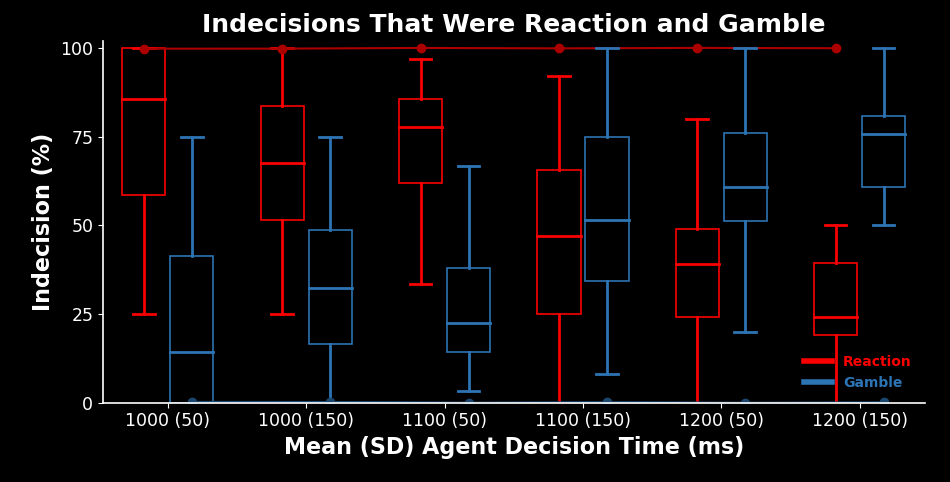

In [ ]:
# Out of x number of indecisions, how many were reaction and gamble
metric1 = group.combine_all_subjects('perc_indecisions_that_were_reactions') 
metric2 = group.combine_all_subjects('perc_indecisions_that_were_gambles') 
optimal_metric1 = group_model.perc_indecisions_that_were_reaction
optimal_metric2 = group_model.perc_indecisions_that_were_gamble
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Indecision (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Indecisions That Were Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'reaction_and_gamble_indecisions', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

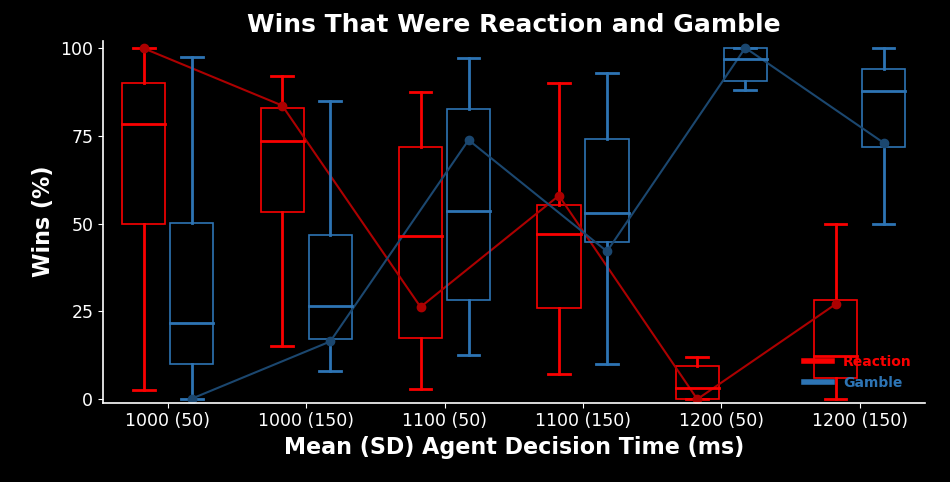

In [ ]:
# Out of x number of reaction and gamble decisions, how many of them were indecisions
metric1 = group.combine_all_subjects('perc_wins_that_were_reactions') 
metric2 = group.combine_all_subjects('perc_wins_that_were_gambles') 
optimal_metric1 = group_model.perc_wins_that_were_reaction
optimal_metric2 = group_model.perc_wins_that_were_gamble
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(-1,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Wins (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Wins That Were Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'wins_that_were_reaction_and_gamble', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Incorrects that were reaction and gamble

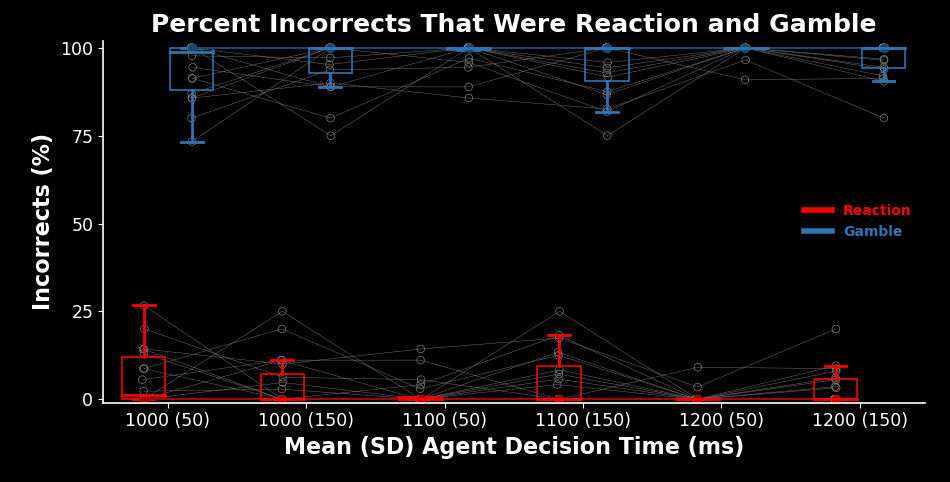

In [ ]:
# Out of x number of reaction and gamble decisions, how many of them were indecisions
metric1 = group.combine_all_subjects('perc_incorrects_that_were_reactions') 
metric2 = group.combine_all_subjects('perc_incorrects_that_were_gambles') 
optimal_metric1 = group_model.perc_incorrects_that_were_reaction
optimal_metric2 = group_model.perc_incorrects_that_were_gamble
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(-1,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Incorrects (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Percent Incorrects That Were Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'wins_that_were_reaction_and_gamble', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

OUt of the Reaction/Gamble How many times did they win

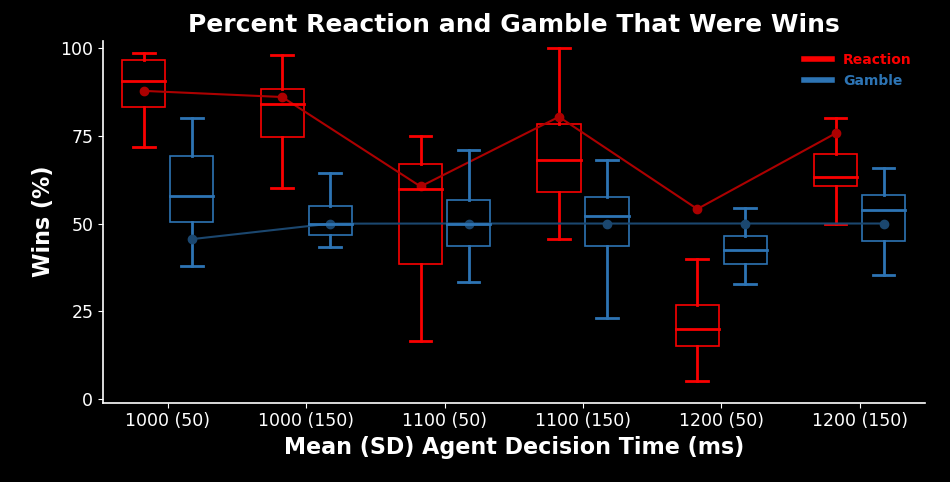

In [ ]:
# Out of x number of reaction and gamble decisions, how many of them were wins
metric1 = group.combine_all_subjects('perc_reactions_that_were_wins') 
metric2 = group.combine_all_subjects('perc_gambles_that_were_wins') 
optimal_metric1 = group_model.perc_reactions_that_were_wins
optimal_metric2 = group_model.perc_gambles_that_were_wins
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(-1,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Wins (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Percent Reaction and Gamble That Were Wins')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'wins_that_were_reaction_and_gamble', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Percent Indecisions of Reaction and Gamble

In [ ]:
#!!!!!!!!!!!! Out of x number of reaction and gamble decisions, how many of them were indecisions!!!!!!!
metric1 = group.combine_all_subjects('perc_reaction_indecisions') 
metric2 = group.combine_all_subjects('perc_gamble_indecisions') 
optimal_metric1 = group_model.perc_indecisions_that_were_reaction
optimal_metric2 = group_model.perc_indecisions_that_were_gamble
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(-1,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Wins (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Percent Wins of Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'wins_that_were_reaction_and_gamble', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

AttributeError: 'Subject' object has no attribute 'perc_reaction_indecisions'